# Data Visualization and Pre-processing

## 1. Download the dataset
Dataset successfully downloaded and uploaded in colob.

## 2. Load Data

In [8]:
import pandas as pd

In [9]:
df=pd.read_csv("Churn_Modelling.csv")

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3.  Perform Below Visualizations.
● Univariate Analysis
● Bi - Variate Analysis
● Multi - Variate Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

● Univariate Analysis

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

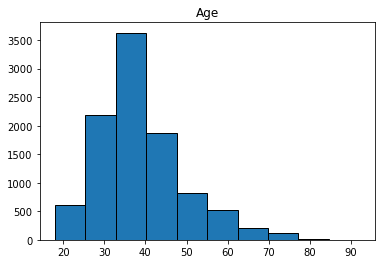

In [13]:
df.hist(column="Age",grid=False,edgecolor='black')

● Bi - Variate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

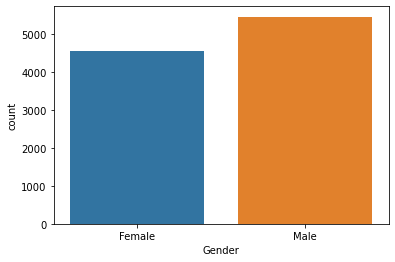

In [14]:
sns.countplot(x='Gender',data=df)

● Multi - Variate Analysis

<AxesSubplot:xlabel='Tenure', ylabel='count'>

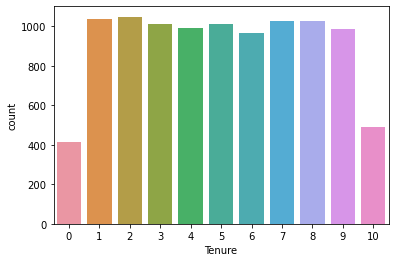

In [15]:
sns.countplot(x="Tenure",data=df)

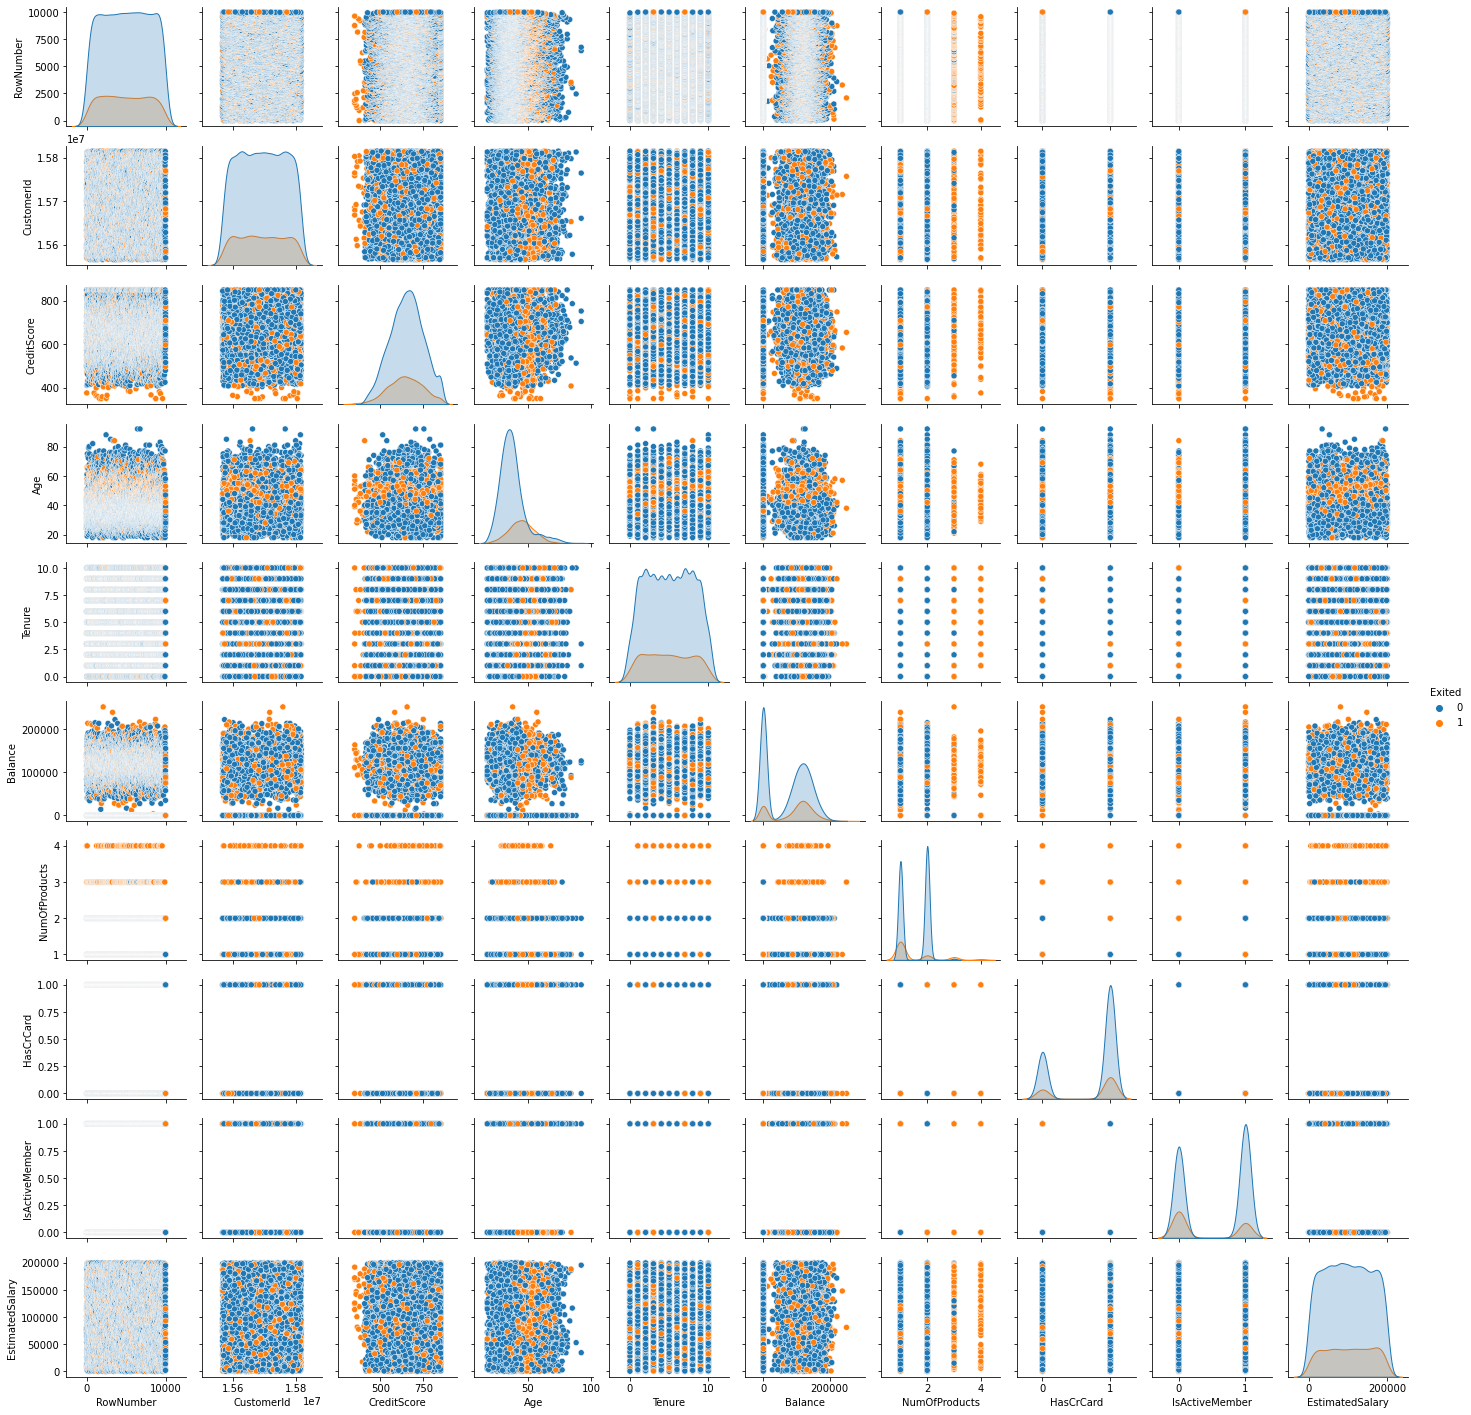

In [16]:
sns.pairplot(df, hue='Exited', height=2)

## 4. Perform descriptive statistics on the dataset

In [18]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Handle the Missing values

In [19]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 6. Find the outliers and replace the outliers

<AxesSubplot:xlabel='CreditScore'>

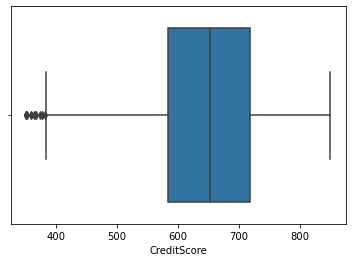

In [23]:
sns.boxplot(x='CreditScore', data=df)

Old Shape:  (10000, 14)
New Shape:  (9984, 14)


<AxesSubplot:xlabel='CreditScore'>

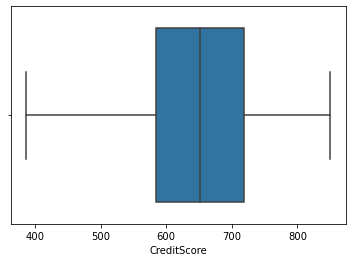

In [25]:
import numpy as np
import sklearn
from sklearn.datasets import load_boston 

Q1 = np.percentile(df['CreditScore'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df['CreditScore'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
print("Old Shape: ", df.shape) 
upper = np.where(df['CreditScore'] >= (Q3+1.5*IQR)) 
lower = np.where(df['CreditScore'] <= (Q1-1.5*IQR)) 
df.drop(upper[0], inplace = True) 
df.drop(lower[0], inplace = True) 
print("New Shape: ", df.shape) 
sns.boxplot(x='CreditScore', data=df)

## 7. Check for Categorical columns and perform encoding

In [26]:
data['Geography']=data['Geography'].map({'France':0,'Spain':1,'Germany':2})
data['Gender']=data['Gender'].map({'Male':0,'Female':1})
data = data.drop(['Surname'],axis=1)

In [27]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 8. Split the data into dependent and independent variables

In [29]:
A = df.iloc[:, :-1].values
print(A)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


In [30]:
B = df.iloc[:, -1].values
print(B)

[1 0 1 ... 1 1 0]


## 9. Scale the independent variables

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["CustomerId"]] = scaler.fit_transform(df[["CustomerId"]])
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    0.275616   Hargrave          619    France  Female   42   
1             2    0.326454       Hill          608     Spain  Female   41   
2             3    0.214421       Onio          502    France  Female   42   
3             4    0.542636       Boni          699    France  Female   39   
4             5    0.688778   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    0.162119   Obijiaku          771    France    Male   39   
9996       9997    0.016765  Johnstone          516    France    Male   35   
9997       9998    0.075327        Liu          709    France  Female   36   
9998       9999    0.466637  Sabbatini          772   Germany    Male   42   
9999      10000    0.250483     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

## 10.Split the data into training and testing

In [32]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 7987
No. of testing examples: 1997
